# <center>Big Data &ndash; Exercises &ndash; Solution</center>
## <center>Fall 2024 &ndash; Week 0 &ndash; ETH Zurich</center>

## 1. Jupyter Basics

Welcome to this Jupyter notebook. Jupyter is a web-based open-source tool based on Python that allows you to run Python (and other types of) code, visualize and discuss results, and organize everything into notebooks like this one. In this course, we use a hosted server inside Docker containers.

A notebook is organized in cells. Cells of this notebook contain Python code (but other cell types exists). To run a cell, select it, then press ctrl+enter. Try it out!

In [1]:
print("Hello World")

Hello World


By default, the last expression is printed. Like this:

In [2]:
maxX = 10
[x * x for x in range(maxX)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

You can also edit the text. Just double-click on a cell. It's made with markdown code. After you are done editing, press ctrl+enter

We will do most of the exercises with Jupyter. You will learn most things as we go. The notebook you are seing is the file from your local file system mounted into Docker (including the output of the cells). Write your answers inline and save regularly.

### Read more:
* [Jupyter](http://jupyter.org/)
* [Learn Python](http://www.learnpython.org)
* [Python documentation](https://docs.python.org/3/)

## 2. Bash Scripts

Code blocks by default are executed using a python interpreter (for a python notebook, such as this one).

Other languages can be used with annotations.
For instance, a code block can be converted into a bash code block using ```%%bash``` at the beginning:

In [3]:
%%bash
echo "Test File" > test_file
cat test_file

Test File


Note: do not expect files you write into this file system to be durable. The sandboxed environment may be reset and data lost when notebook is closed. The notebook files themselves are durable though.

Bash commands can be also inlined using exclamation mark (```!```) infront of the bash line

In [4]:
print("First I modify the file.")

!echo "Hello World" > test_file

print("Then I check its content:")
print()

!cat test_file

First I modify the file.
Then I check its content:

Hello World


## 3. Connecting to a Database

As part of this course you will use Jupyter to interact with various systems and interfaces (e.g. SQL, Map Reduce, Spark). In this notebook, we test a simple connection to a SQL database that is run in a different Docker container.

#### 3.0. Setting up Docker

We will be working in the Exam Magic Box (you can find it on Moodle if you have not downloaded it yet): Please drag this Notebook in the folder. Activate the docker container for the exercise sheet with `docker compose up`; please wait for the message `PostgreSQL init process complete; ready for start up` in the docker logs before proceeding! Alternatively you can start the Docker with `docker compose up -d` and wait for the command to execute: please note that you are creating the containers in the background this way. You can then type `docker compose down` when you are done.

#### 3.1. Setting up a SQL connection

To start, we define some variables describing our connection to the database (make sure you execute the next code block by running ctrl+enter).

In [5]:
server='db'
user='postgres'
password='example'
database='postgres'
connection_string=f'postgresql://{user}:{password}@{server}:5432/{database}'

#### 3.2. Running a SQL Query
Then we run a first query against our server. This should print the version information of the database.

In [6]:
import sqlalchemy

engine = sqlalchemy.create_engine(connection_string)
conn = engine.connect()
print(conn.execute(sqlalchemy.text('SELECT version()')).fetchall())

[('PostgreSQL 16.2 (Debian 16.2-1.pgdg120+2) on aarch64-unknown-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit',)]


#### 3.3. Inlining SQL 
It is also possible to inline SQL code (thanks an extension that enables [SQL "magic"](https://github.com/catherinedevlin/ipython-sql) that is installed alongside Jypter). With the following cell, we load the extension and establish a connection to our database from above. Run the cell and make sure you don't get any errors.

In [7]:
%reload_ext sql
%sql $connection_string

Now we can use the ```%sql``` and ```%%sql``` magic words to run SQL directly. ```%%sql``` makes a cell a SQL cell. A SQL cell can run an arbitrary number of SQL statements and displays the result of the last one of them.

Let's see the version number again:

In [8]:
%%sql
SELECT version();

 * postgresql://postgres:***@db:5432/postgres
1 rows affected.


version
"PostgreSQL 16.2 (Debian 16.2-1.pgdg120+2) on aarch64-unknown-linux-gnu, compiled by gcc (Debian 12.2.0-14) 12.2.0, 64-bit"


The ```%sql``` magic words lets us run SQL statements in a regular cell. Again, the result of the last statement is displayed.

In [9]:
print("Run a query!")
%sql SELECT Id, DisplayName FROM Users ORDER BY Id LIMIT 10;

Run a query!
 * postgresql://postgres:***@db:5432/postgres
10 rows affected.


id,displayname
-1,Community
1,Geoff Dalgas
2,Nick Craver
3,Kevin Montrose
4,Lewis Goddard
5,brian_d
6,moteutsch
7,jhericks
8,Felipe Sabino
9,Rebecca Chernoff


#### 3.4. Plotting results
Matplotlib can also be used to plot results. Next is a plot of a sample query that finds the number of created users per year.

 * postgresql://postgres:***@db:5432/postgres
7 rows affected.
+--------------+-------+
| creationyear | count |
+--------------+-------+
|    2012.0    |  688  |
|    2013.0    |  441  |
|    2014.0    |  601  |
|    2015.0    |  823  |
|    2016.0    |  807  |
|    2017.0    |  825  |
|    2018.0    |  499  |
+--------------+-------+


Text(0, 0.5, 'Number of Users')

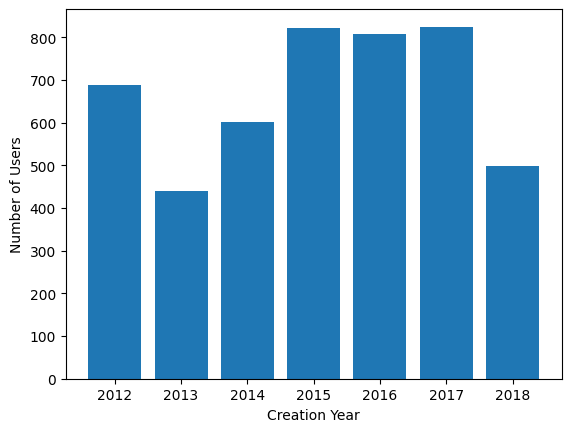

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

result = %sql SELECT DATE_PART('year', CreationDate) as CreationYear, COUNT(*) as Count \
                FROM Users \
                GROUP BY DATE_PART('year', CreationDate) \
                ORDER BY DATE_PART('year', CreationDate) ASC;
            
# Print the result in tabular form
print(result)
            
# Convert the result to a Pandas data frame
df = result.DataFrame()

# Extract x and y values for a plot
x = df['creationyear'].tolist()
y = df['count'].tolist()

# Plot the distribution of registrations per year
fig, ax = plt.subplots()
ax.bar(range(len(df.index)), y, tick_label=[int(i) for i in x], align='center')
ax.set_xlabel('Creation Year')
ax.set_ylabel('Number of Users')